In [1]:
%pylab inline
import netCDF4 as nc
import matplotlib.ticker
import os.path
execfile('Setup_Paths.py')
execfile(repdir+'pv_tools/climate.py')
execfile(repdir+'pv_tools/io.py')
style.use(['fivethirtyeight',progdir+'presentation.mplstyle'])

Populating the interactive namespace from numpy and matplotlib
homedir:  /Users/mjucker/
repdir:   /Users/mjucker/Repositories/
progdir:  /Users/mjucker/Dropbox/Python/
savedir:  /Users/mjucker/Downloads/


In [2]:
datadir=homedir+'GoogleDrive/tmp/coldpoint/'
tropLim = 20
winterMonth = 1
summerMonth = winterMonth+6

In [3]:
latScan = arange(0,60,10)
caseNumbers = []
# m = 1
#caseNumbers.append([3923446,3923594,3937398,3951946,3953128,3937406]) # A=0.40, m=1, plev_def.sh
#caseNumbers.append([4017974,4052267,4052269,4050515,4017801,4050523]) # A=0.35, m=1, plev_unsig.sh
caseNumbers.append([4099451,4099453,4099454,4099455,4099456,4099457]) # A=0.35, m=1, plev_ttl.sh
# m = 2
#caseNumbers.append([3902008,3902011,3923630,3923664,3937643,3923837]) # A=0.40, m=2, plev_def.sh
#caseNumbers.append([4187708,4225475,4229416]) # A=0.40, m=2, plev_ttl.sh
#caseNumbers.append([3965169,4017977,4017979,4017798,3971217,4017799]) # A=0.35, m=2, plev_unsig.sh
caseNumbers.append([4343644,4344756,0,4110380,4110381,4158141]) # A=0.35, m=2, plev_ttl.sh

In [4]:
pres = []
for l in range(len(latScan)):
    if min(caseNumbers[0][l],caseNumbers[1][l]) > 0:
        for c in range(2):
            fileName = datadir+'temp_'+str(caseNumbers[c][l])+'.nc'
            if not os.path.isfile(fileName):
                fileName = datadir+'daily_'+str(caseNumbers[c][l])+'.nc'
                if not os.path.isfile(fileName):
                    raise Exception('file '+fileName+' does not exist!')
            file = ComputeClimate(fileName,'monthly')
            file = nc.Dataset(file,'r')
            if len(pres)==0:
                lat = file.variables['lat'][:]
                pres= file.variables['pfull'][:]
                months=file.variables['time'][:]
                J = find(abs(lat)<=tropLim)
                I = find(pres>=1)
                pres = pres[I]
                T = zeros((2,len(latScan),len(months),len(I)))
            T[c,l,:,:] = file.variables['temp'][:,I,J].mean(axis=-1)

The time dimension is in units of seconds , with a time step of 5.0 days
The simulation is 3600.0 days long, which I assume means 10.0 years of 360 days.
Averaging variables:
                      temp
DONE, wrote file //Users/mjucker/GoogleDrive/tmp/coldpoint/temp_4099451_monthly.nc
The time dimension is in units of seconds , with a time step of 5.0 days
The simulation is 3600.0 days long, which I assume means 10.0 years of 360 days.
Averaging variables:
                      flux_sw
                      precip
                      ps
                      rh
                      sphum
                      t_surf
                      temp
                      time_bounds
                      ucomp
DONE, wrote file //Users/mjucker/GoogleDrive/tmp/coldpoint/daily_4343644_monthly.nc
The time dimension is in units of seconds , with a time step of 5.0 days
The simulation is 3600.0 days long, which I assume means 10.0 years of 360 days.
Averaging variables:
                      temp

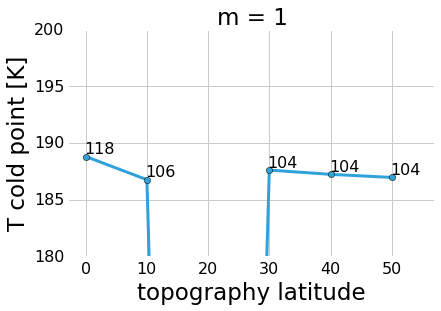

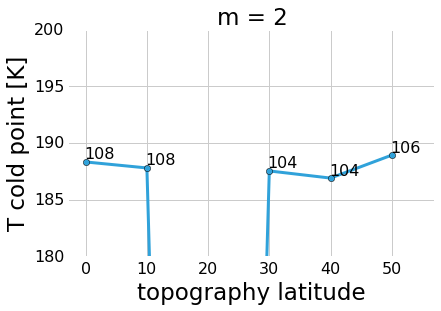

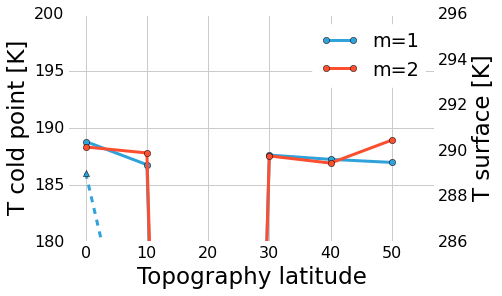

In [5]:
##cols= get_cmap('Set2',2)
#fig=subplots(1,2)
#for l in range(len(latScan)):
#    subplot(1,2,1)
#    plot(T[0,l,winterMonth,:],pres[I],alpha=0.3)#color=cols(0))
#    plot(T[1,l,winterMonth,:],pres[I],alpha=0.3)#color=cols(1))
#yscale('log')
#ylim(1000,1)
#xlim(180,300)
#subplot(1,2,2)
yWin = (180,200)
xWin = (min(latScan)-3,max(latScan)+7)
#Icp = (pres >= 100)*(pres <= 150)
Icp = (pres >= 100)*(pres <= 110)
#Ittl= (pres >=  50)*(pres <= 120 )
Ittl= (pres >=  70)*(pres < 100 )
presTtl = pres[Ittl]
Tcp = zeros((2,len(latScan)))
Pcp = zeros_like(Tcp)
DT  = zeros_like(Tcp)
Pdt = zeros_like(Tcp)
for p in range(len(latScan)):
    minInd   = T[:,p,winterMonth,:].argmin(axis=-1)
    #Tcp[:,p] = T[:,p,winterMonth,:].min(axis=-1)
    Tcp[:,p] = T[:,p,winterMonth,Icp].mean(axis=-1)
    Pcp[:,p] = pres[minInd]
    DT [:,p] = (T[:,p,summerMonth,Ittl] - T[:,p,winterMonth,Ittl]).mean(axis=-1)
    minInd   = (T[:,p,summerMonth,Ittl] - T[:,p,winterMonth,Ittl]).argmax(axis=-1)
    Pdt[:,p] = presTtl[minInd]
Tbt = T[:,:,winterMonth,-1]
for f in range(2):
    figure()
    plot(latScan,Tcp[f,:],'o-')
    ylim(yWin)
    xlim(xWin)
    ylabel('T cold point [K]')
    xlabel('topography latitude')
    title('m = '+str(f+1))
    for p in range(len(latScan)):
        if Tcp[f,p] > 0:
            text(latScan[p],Tcp[f,p]+0.3,str(int(Pcp[f,p])))
fig,ax1 = subplots()
ax1.plot(latScan,Tcp.T,'o-')
ylim(yWin);
legend(['m=1','m=2'],loc='best')
#title('Cold point temperature')
ylabel('T cold point [K]')
xlabel('Topography latitude')
#for p in range(len(latScan)):
#    ax1.text(latScan[p],Tcp[0,p]+0.3,str(int(Pcp[0,p])))
ax2 = ax1.twinx()
ax2.plot(latScan,Tbt.T,'^--')
ylim(286,296)
ylabel('T surface [K]')
xlim(xWin);
grid(False)

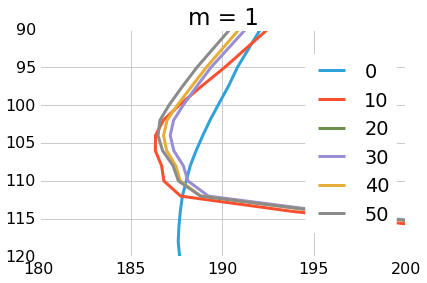

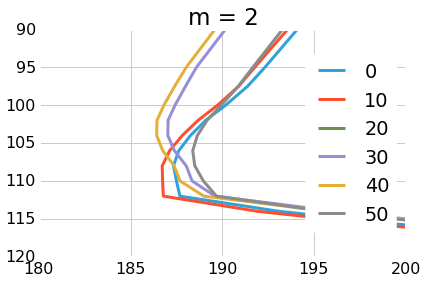

In [6]:
for f in range(2):
    fig,ax = subplots()
    for l in range(len(latScan)):
        ax.plot(T[f,l,winterMonth,:],pres,label=str(latScan[l]))
    ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%g'))
    ylim(250,50)
    ylim(120,90)
    xlim(180,200)
    title('m = '+str(f+1))
    legend(loc='right')

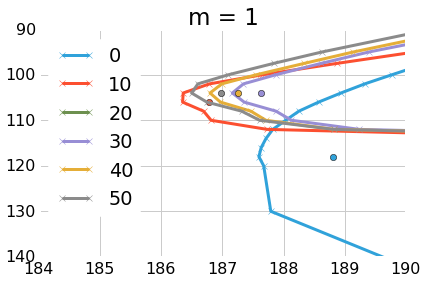

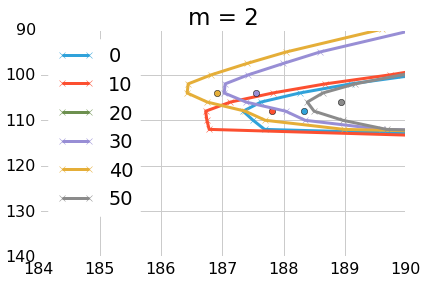

In [7]:
for f in range(2):
    figure()
    for l in range(len(latScan)):
        plot(T[f,l,winterMonth,:],pres,'-x',color=rcParams['axes.color_cycle'][l],label=str(latScan[l]));#ylim(1000,0.1)
        plot(Tcp[f,l],Pcp[f,l],'o',color=rcParams['axes.color_cycle'][l])
    title('m = '+str(f+1))
    ylim(140,90)
    #ylim(120,90)
    xlim(184,190);
    legend(loc='best')

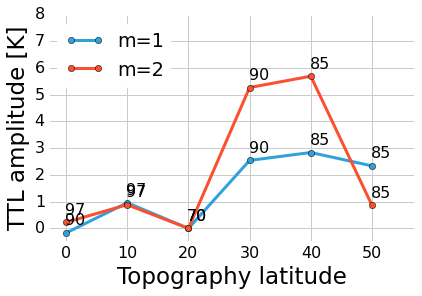

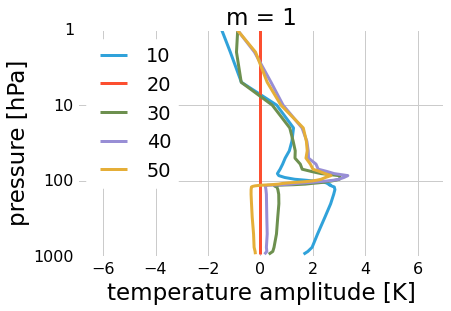

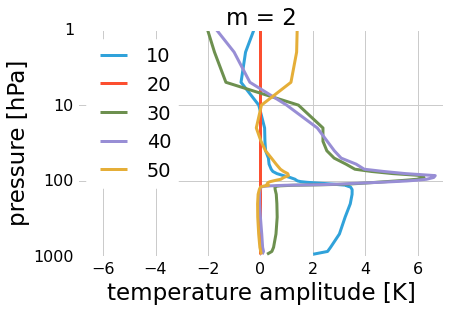

In [8]:
fig,ax1 = subplots()
ax1.plot(latScan,DT.T,'o-')
ylim(0,10);
legend(['m=1','m=2'],loc='best')
#title('Cold point temperature')
ylabel('TTL amplitude [K]')
xlabel('Topography latitude')
xlim(xWin);
ylim(-0.5,8)
for f in range(2):
    for p in range(len(latScan)):
        ax1.text(latScan[p],DT[f,p]+0.3,str(int(Pdt[f,p])))
#
for f in range(2):
    fig,ax = subplots()
    tmp = T[f,:,summerMonth,:]-T[f,:,winterMonth,:]
    for p in range(1,len(latScan)):
        ax.semilogy(tmp[p],pres,label=str(latScan[p]))
    ax.yaxis.set_major_formatter(matplotlib.ticker.FormatStrFormatter('%g'))
    title('m = '+str(f+1))
    xlim(-7,7)
    ylim(1000,1)
    ylabel('pressure [hPa]')
    xlabel('temperature amplitude [K]')
    legend(loc='best')